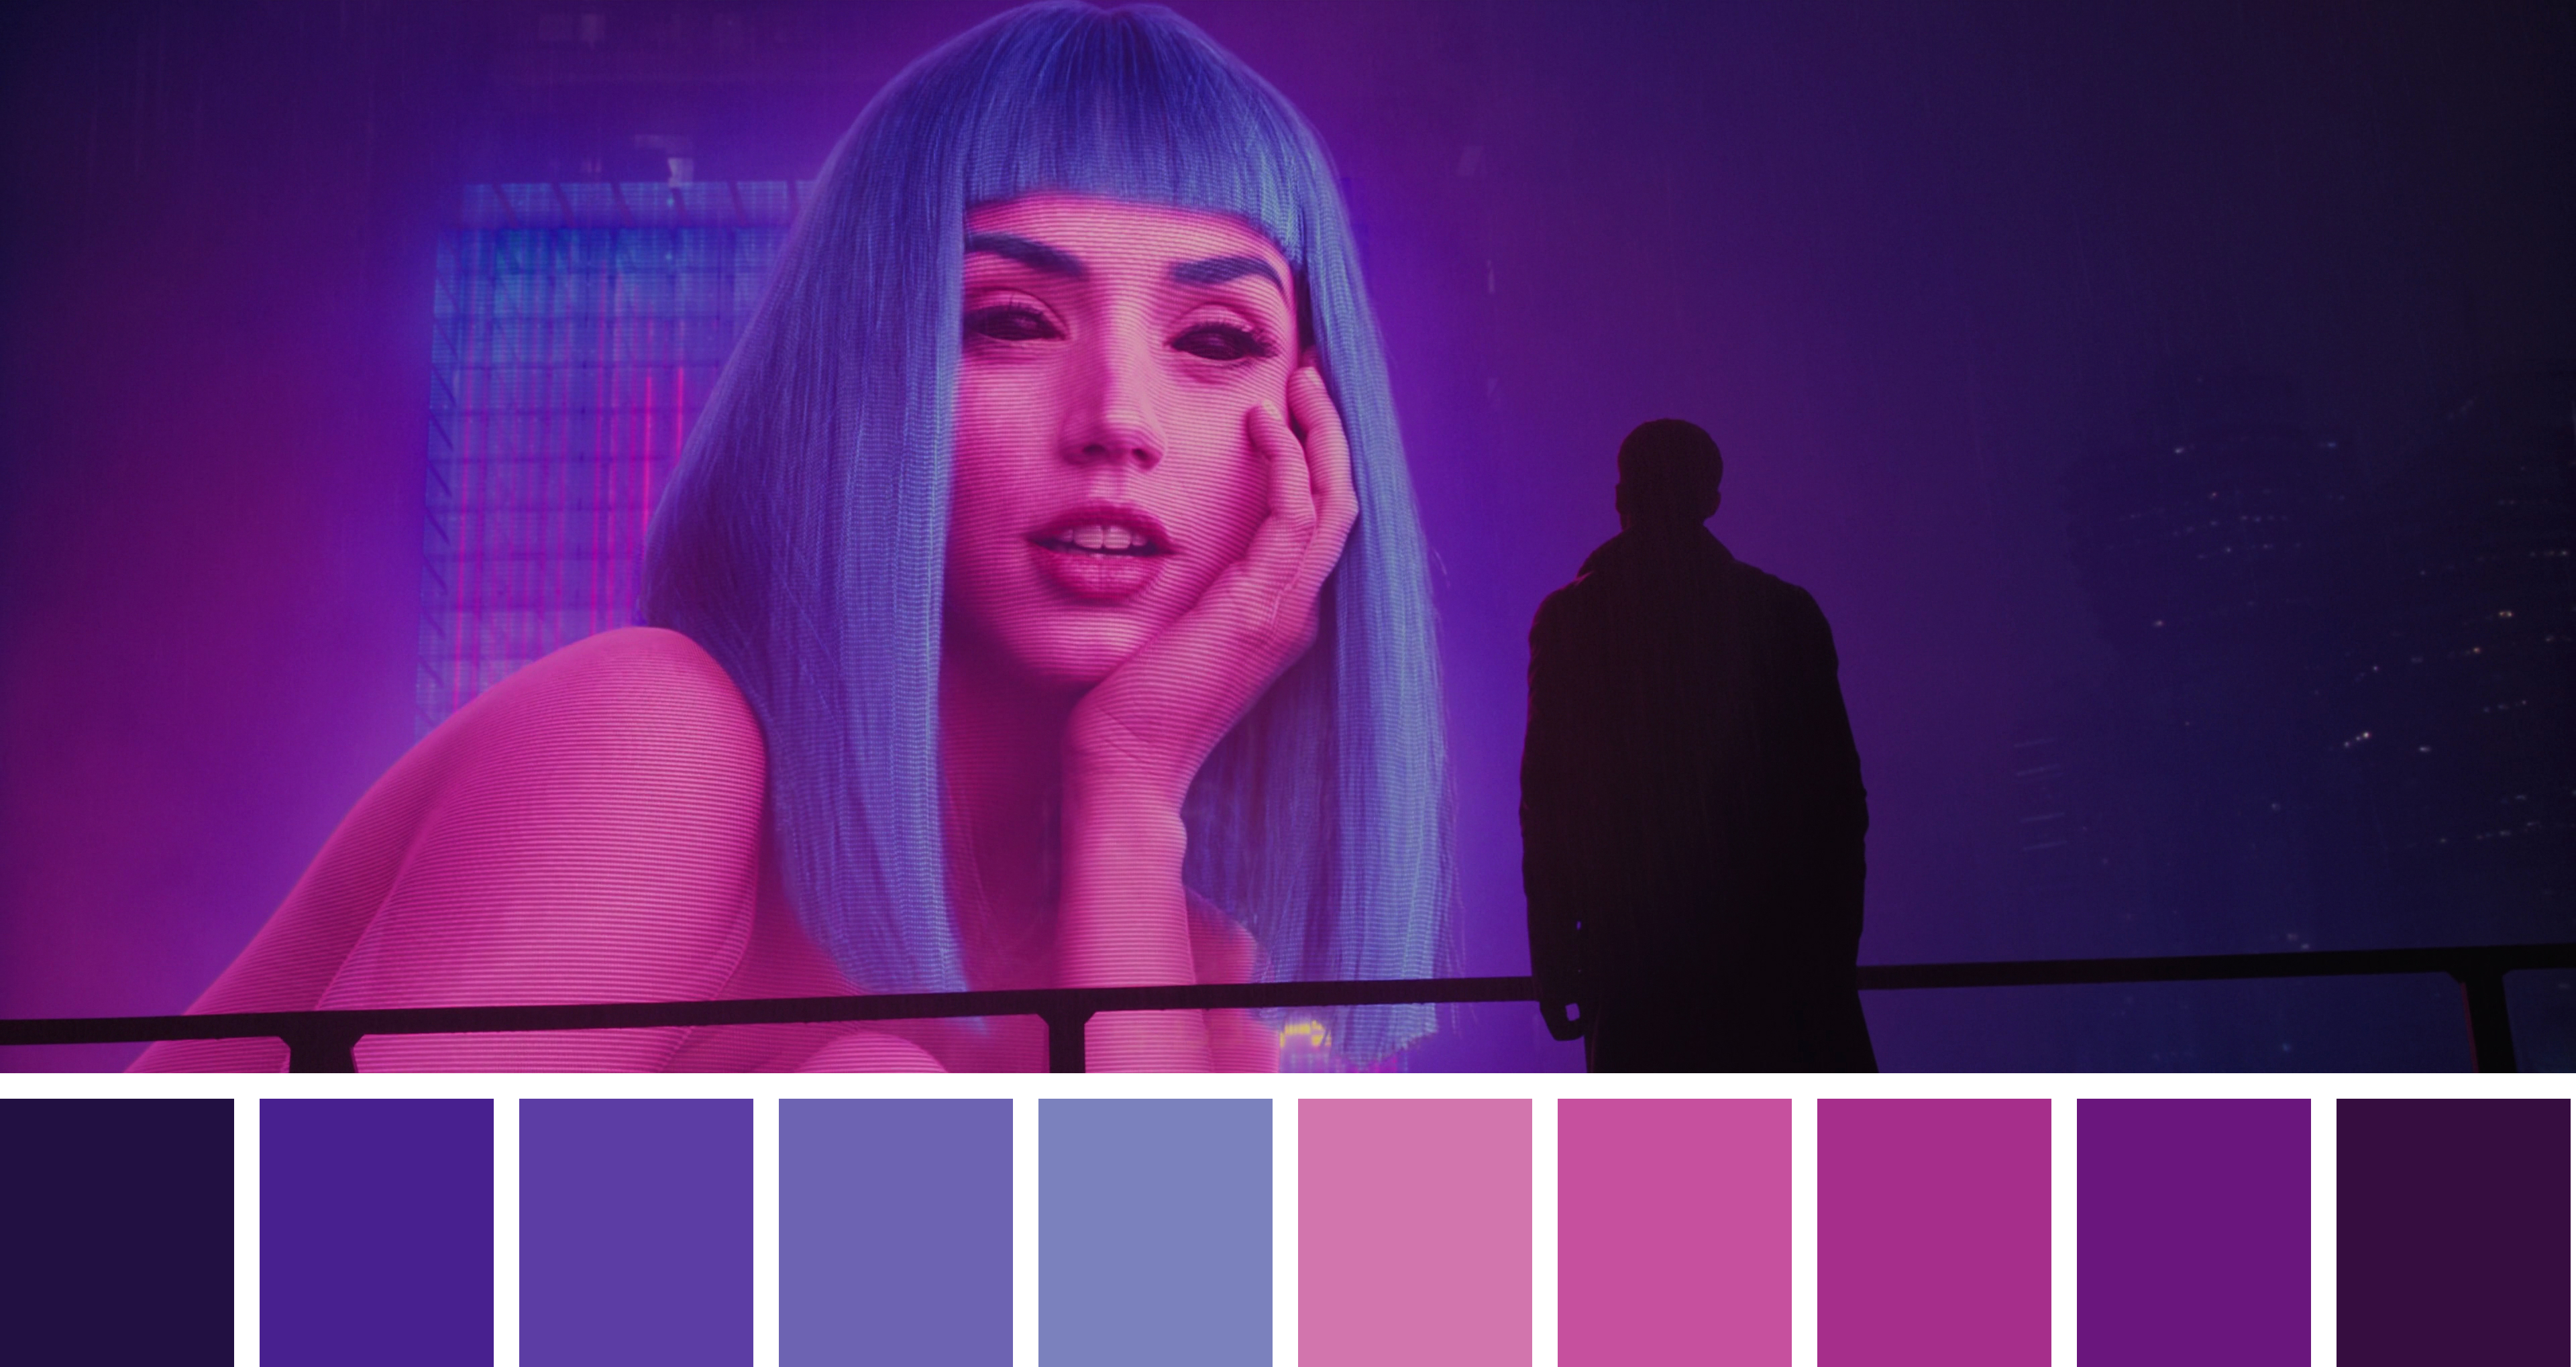

In [50]:
import colorgram
from PIL import Image
import math
import colorsys

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
    
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

def step (r,g,b, repetitions=1):
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )
    h, s, v = colorsys.rgb_to_hsv(r,g,b)
    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)
    if h2 % 2 == 1:
        v2 = repetitions - v2
        lum = repetitions - lum
    return (h2, lum2, v2)

def sort_tone(colors, length):
    tone_counter = 0
    change = 0
    for i in range(length):
        if i > 0 and colors[i].rgb.r < colors[i-1].rgb.r:
            tone_counter = tone_counter + 1
            change = i

    tmp = 0
    if int(tone_counter) == 1: 
        for i in range(change, int(change + (length - change)/2 + 1)):
            tmp = colors[i]
            colors[i] = colors[change + length - i -1]
            colors[change + length - i -1] = tmp

            
#Dichiaro il percorso dell'immagine da analizzare
path = "Images/image1.jpg"
#path = input()
image = Image.open(path)
width, height = image.size


#Estraggo i 10 colori più frequenti nell'immagine
colors = colorgram.extract(image, 10)


#Sorto i colori 
colors = sorted(colors, key=lambda c: step(c.rgb.r, c.rgb.g, c.rgb.b, 8))

    
#Se la lista di colori ha due colori più scuri di tonalità diverse, creo una lista a due toni        
sort_tone(colors, len(colors))

#Genero l'immagine finale
white_separator = Image.new(mode = "RGB", size = (int(width/(11*9)), int(height/4)), color = (255, 255, 255))
palette = Image.new(mode = "RGB", size = (0, int(height/4)), color = (255, 255, 255))
for i in colors:
    color = Image.new(mode = "RGB", size = (int(width/11), int(height/4)), color = i.rgb)
    palette = get_concat_h(palette, color)
    palette = get_concat_h(palette, white_separator)
    
h_white = Image.new(mode = "RGB", size = (width, int(width/(11*9))), color = (255, 255, 255))
final = get_concat_v(image, h_white)
final = get_concat_v(final, palette)
final.save("Images/Palettes/image.png")
final